In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
params = {'legend.fontsize': 25,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

In [3]:
data_list = []
S_list = []
for T in [0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]:
    tmp2 = np.load('%sT/orientations.npy' % T)[1000:]
    tmp2 = np.reshape(tmp2, (tmp2.shape[0], tmp2.shape[1] * tmp2.shape[2]))
    data_list.append(tmp2)
    S = np.load('%sT/S.npy' % T)[1000:10000]
    S_list.append(S)
S = np.concatenate(S_list)

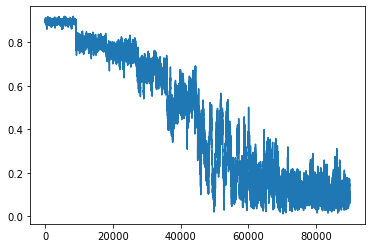

In [17]:
plt.plot(S)

In [18]:
data = np.concatenate(data_list, axis = 0)

In [19]:
covar = np.matmul((data - data.mean(0)[None,:]).T, (data - data.mean(0)[None,:])) / data.shape[0]

In [20]:
eigvals, eigvecs = np.linalg.eigh(covar)
eigvals = eigvals[::-1]
eigvecs = eigvecs[:,::-1]

In [21]:
PC0 = np.matmul(eigvecs[:,0], data.T)
PC1 = np.matmul(eigvecs[:,1], data.T)

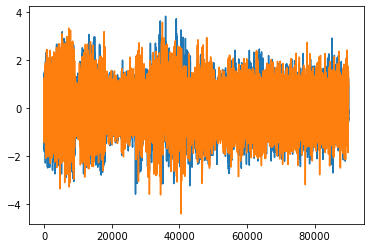

In [22]:
plt.plot(PC0)
plt.plot(PC1)

In [64]:
mean_PC0 = []
std_PC0 = []
for T in [0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]:
    print(T)
    tmp = np.load('%sT/orientations.npy' % T)[::10]
    tmp = np.reshape(tmp, (tmp.shape[0], tmp.shape[1] * tmp.shape[2]))
    tmp2 = np.matmul(eigvecs[:,0], tmp.T)
    mean_PC0.append(tmp2.mean())
    std_PC0.append(tmp2.std())

0.5
1.0
1.2
1.5
1.7
1.8
1.9
2.0
2.2
2.4


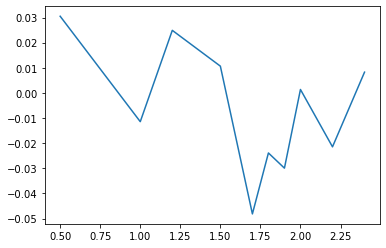

In [65]:
plt.plot([0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4], mean_PC0)

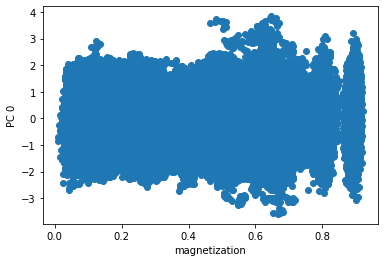

In [66]:
plt.plot(S, PC0, marker = 'o', lw = 0)
plt.xlabel('magnetization')
plt.ylabel('PC 0')
plt.show()
plt.close()

In [5]:
# now try with the cosines instead

cosines_list = []
for T in [0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]:
    tmp2 = np.load('%sT/cosines.npy' % T)[1000:]
    #tmp2 = np.reshape(tmp2, (tmp2.shape[0], tmp2.shape[1] * tmp2.shape[2]))
    cosines_list.append(tmp2**2)
cosines = np.concatenate(cosines_list, axis = 0)

In [6]:
covar = np.matmul((cosines - cosines.mean(0)[None,:]).T, (cosines - cosines.mean(0)[None,:])) / cosines.shape[0]

In [7]:
eigvals, eigvecs = np.linalg.eigh(covar)
eigvals = eigvals[::-1]
eigvecs = eigvecs[:,::-1]

In [8]:
PC0 = np.matmul(eigvecs[:,0], (cosines - cosines.mean(0)).T)
PC1 = np.matmul(eigvecs[:,1], (cosines - cosines.mean(0)).T)
PC2 = np.matmul(eigvecs[:,2], (cosines - cosines.mean(0)).T)

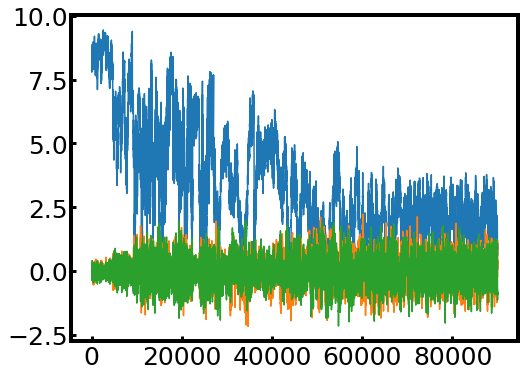

In [15]:
plt.plot(abs(PC0))
plt.plot(PC1)
plt.plot(PC2)

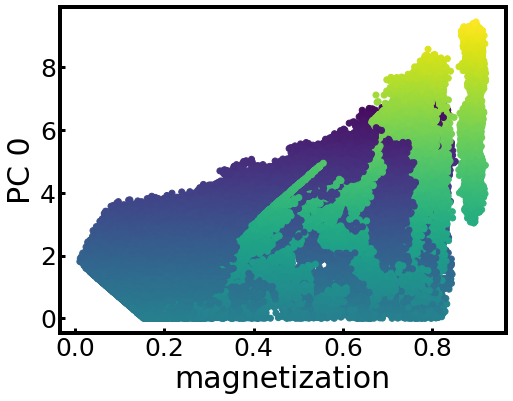

In [16]:
plt.scatter(S, abs(PC0), marker = 'o', c = PC0)
plt.xlabel('magnetization')
plt.ylabel('PC 0')
plt.show()
plt.close()

In [17]:
np.corrcoef(S, PC0)

array([[1.        , 0.58086213],
       [0.58086213, 1.        ]])

In [18]:
mean_PC0 = []
std_PC0 = []
for T in [0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]:
    print(T)
    tmp = np.load('%sT/cosines.npy' % T)[1000:]**2
    #tmp = np.reshape(tmp, (tmp.shape[0], tmp.shape[1] * tmp.shape[2]))
    tmp2 = np.matmul(eigvecs[:,0], (tmp - tmp.mean(0)).T)
    mean_PC0.append(tmp2.mean())
    std_PC0.append(tmp2.std())

0.5
1.0
1.2
1.5
1.7
1.8
1.9
2.0
2.2
2.4


In [19]:
tmp.shape

(9000, 343)

In [20]:
tmp2.mean()

4.736951571734001e-16

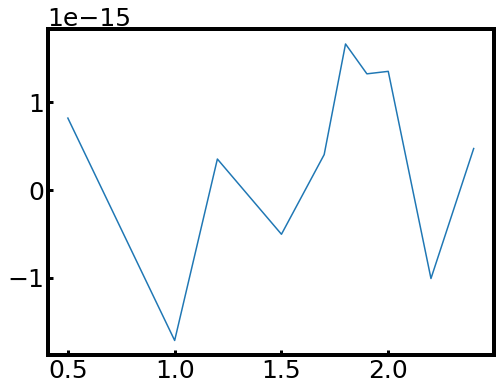

In [21]:
plt.plot([0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4], mean_PC0)

In [22]:
mean_S

NameError: name 'mean_S' is not defined

In [23]:
T_list = [0.5, 1.0, 1.2, 1.5, 1.7, 1.8, 1.9, 2.0, 2.2, 2.4]
mean_S = np.zeros(len(T_list))
std_S = np.zeros(len(T_list))
log_mean_S = np.zeros(len(T_list))
log_std_S = np.zeros(len(T_list))
S_sample_list = []

for i, temperature in enumerate(T_list):

    S = np.load('thermomaps-gayberne/%sT/S.npy' % temperature)
    S_sample_list.append(S)
    mean_S[i] = S.mean()
    std_S[i] = S.std()

    log_mean_S[i] = np.log(S).mean()
    log_std_S[i] = S.std() * abs(1 / S.mean())
S_sample_list = np.array(S_sample_list)

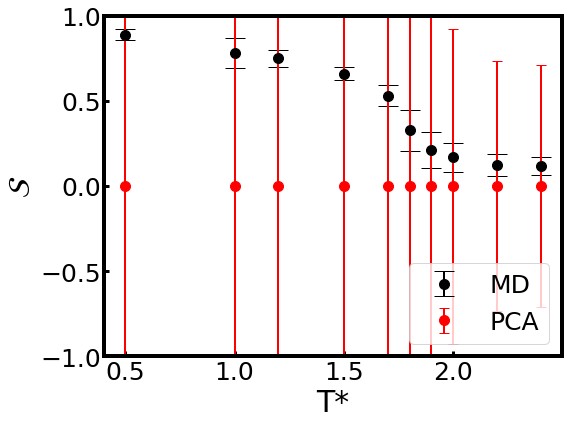

In [24]:
# switches sign at the transition state
plt.errorbar(T_list, mean_S, yerr = std_S, marker = 'o', capsize = 10, markersize = 10, lw = 0, color = 'k', elinewidth = 2, capthick = True,
            label = 'MD')
plt.errorbar(T_list, mean_PC0, yerr = std_PC0, marker = 'o', lw = 0, c = 'r', markersize = 10,
            capthick = True, elinewidth = 2, capsize = 5, label = 'PCA')

plt.xlabel(r'T*')
plt.ylabel(r'$\mathcal{S}$')
plt.legend(loc = 'lower right')
plt.ylim((-1, 1))
plt.tight_layout()
plt.savefig('S_PCA_MD.pdf', dpi = 300)
plt.show()
plt.close()